In [1]:
import pandas as pd
import warnings
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
% matplotlib inline

dateparse = lambda dates: pd.datetime.strptime(dates, '%d.%m.%Y %H:%M:%S')
dataFrame = pd.read_csv(r"C:\Macros\117661-1.CSV", sep=";", parse_dates=['dt_venda'], 
                        index_col='dt_venda', date_parser=dateparse)


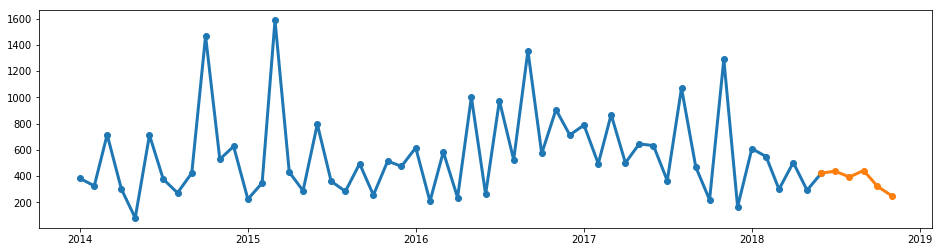

In [2]:
ts = dataFrame['qt_vendida']
train = ts[0:54]
teste = ts[53:]
plt.figure(figsize=(16,4))
plt.plot(train, label='Train', linewidth=3, markersize=6, marker='o')
plt.plot(teste, label='Teste', linewidth=3, markersize=6,  marker='o');

<h2>Suavização Exponencial Simples</h2>

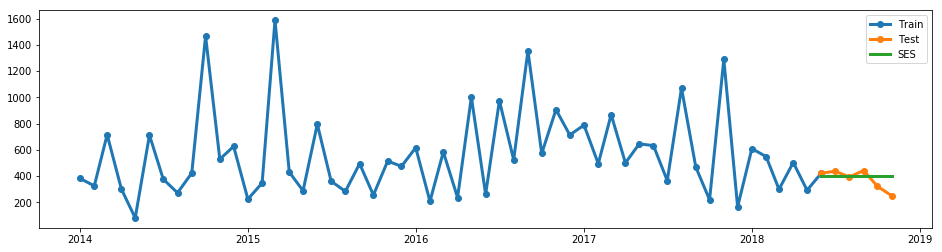

In [12]:
#smoothing_level=0.6,optimized=False
y_hat_avg = pd.DataFrame(teste.copy())
model_fit = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = model_fit.forecast(len(teste))
plt.figure(figsize=(16,4))
plt.plot(train, label='Train', linewidth=3, markersize=6, marker='o', )
plt.plot(teste, label='Test', linewidth=3, markersize=6, marker='o' )
plt.plot(y_hat_avg['SES'],linewidth=3, label='SES')
plt.legend(loc='best')
rmse_ses = sqrt(mean_squared_error(teste, y_hat_avg.SES));

<h2>Teste decomposição ADFULLER</h2>

Test Statistic       -9.108441e+00
p-value               3.451437e-15
#Lags Used            0.000000e+00
Number of Used        5.300000e+01
Critical Value 1%    -3.560242e+00
Critical Value 5%    -2.917850e+00
Critical Value 10%   -2.596796e+00
dtype: float64


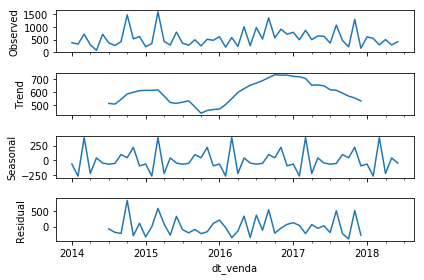

In [5]:
sm.tsa.seasonal_decompose(train).plot()
result = sm.tsa.stattools.adfuller(train)
dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Used'])
for key,value in result[4].items():
    dfoutput[f'Critical Value {key}'] = value
print(dfoutput);

<h2>Holt Linear</h2>

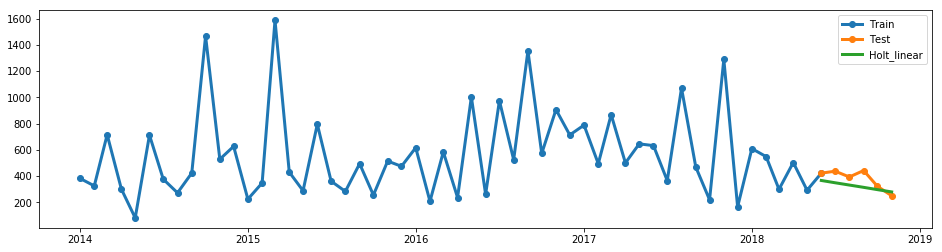

In [10]:
y_hat_avg = pd.DataFrame(teste.copy())
fit1 = Holt(np.asarray(train)).fit(smoothing_level = 0.6,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(teste))
plt.figure(figsize=(16,4))
plt.plot(train, label='Train', linewidth=3, markersize=6, marker='o')
plt.plot(teste, label='Test', linewidth=3, markersize=6, marker='o')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear',linewidth=3)
plt.legend(loc='best')
rmse_Holt_linear = sqrt(mean_squared_error(teste, y_hat_avg.Holt_linear));

In [15]:
y_hat_avg['Holt_linear']

dt_venda
2018-06-01    381.325552
2018-07-01    362.666969
2018-08-01    344.008387
2018-09-01    325.349805
2018-10-01    306.691222
2018-11-01    288.032640
Name: Holt_linear, dtype: float64

<h2>Holt Winter</h2>

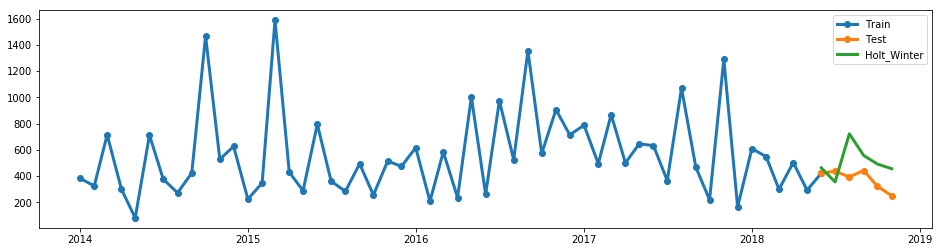

In [16]:
y_hat_avg = pd.DataFrame(teste.copy())
fit1 = ExponentialSmoothing(np.asarray(train) ,seasonal_periods=12,trend='add', seasonal='add' ).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(teste))
plt.figure(figsize=(16,4))
plt.plot( train, label='Train', linewidth=3, markersize=6, marker='o')
plt.plot(teste, label='Test', linewidth=3, markersize=6, marker='o')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter',linewidth=3)
plt.legend(loc='best')
rmse_Holt_Winter = sqrt(mean_squared_error(teste, y_hat_avg.Holt_Winter));

<h2>SARIMA</h2>

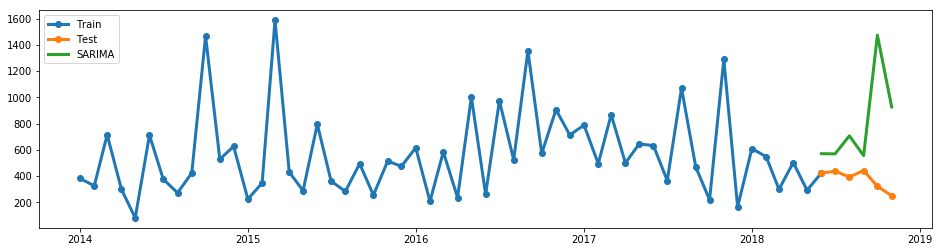

In [31]:
y_hat_avg = pd.DataFrame(teste.copy())
fit1 = sm.tsa.statespace.SARIMAX(train, order=(6, 0, 7),seasonal_order=(3,1,1,12), 
                                 enforce_stationarity=False, enforce_invertibility=False).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2018-03-01", end="2018-11-01", dynamic=True )
plt.figure(figsize=(16,4))
plt.plot(train, label='Train', linewidth=3, markersize=6, marker='o')
plt.plot(teste, label='Test', linewidth=3, markersize=6, marker='o')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA', linewidth=3)
plt.legend(loc='best')
rmse_SARIMA = sqrt(mean_squared_error(teste, y_hat_avg.SARIMA))
warnings.filterwarnings("ignore");

<h2>ARIMA</h2>

ARIMA(0, 0, 0) MSE=38167.439
ARIMA(0, 0, 1) MSE=54355.214
ARIMA(0, 0, 2) MSE=48076.382
ARIMA(0, 1, 0) MSE=16184.966
ARIMA(0, 1, 1) MSE=56692.376
ARIMA(0, 2, 0) MSE=70206.326
ARIMA(0, 2, 1) MSE=16814.538
ARIMA(1, 0, 0) MSE=54103.538
ARIMA(1, 0, 1) MSE=52901.542
ARIMA(1, 1, 0) MSE=6328.870
ARIMA(1, 1, 1) MSE=47773.818
ARIMA(1, 1, 2) MSE=12921.457
ARIMA(1, 2, 0) MSE=21556.398
ARIMA(2, 0, 0) MSE=51001.206
ARIMA(2, 0, 1) MSE=34922.836
ARIMA(2, 1, 0) MSE=7434.390
ARIMA(2, 1, 1) MSE=34960.143
ARIMA(2, 1, 2) MSE=53922.446
ARIMA(2, 2, 0) MSE=4885.334
ARIMA(4, 0, 0) MSE=33931.555
ARIMA(4, 0, 1) MSE=31059.813
ARIMA(4, 0, 2) MSE=39686.250
ARIMA(4, 1, 0) MSE=11462.248
ARIMA(4, 1, 1) MSE=14909.384
ARIMA(4, 2, 0) MSE=13422.980
ARIMA(4, 2, 1) MSE=7502.153
ARIMA(4, 2, 2) MSE=8218.845
ARIMA(6, 0, 0) MSE=32459.016
ARIMA(6, 0, 1) MSE=34968.615
ARIMA(6, 1, 0) MSE=22011.256
ARIMA(6, 1, 2) MSE=41294.897
ARIMA(6, 2, 1) MSE=17629.045
ARIMA(8, 0, 0) MSE=42453.874
ARIMA(8, 0, 1) MSE=31178.687
ARIMA(8, 1, 0) MSE=

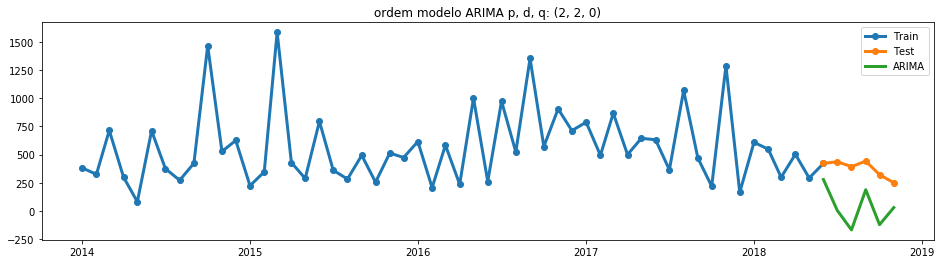

In [11]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
arima_order = []
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:51],   X[51:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order, mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    arima_order.append(best_cfg)
    
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

y_hat_avg = pd.DataFrame(teste.copy())
fit1 = ARIMA(train, order=arima_order[0]).fit(disp=0)
y_hat_avg['ARIMA'] = fit1.predict(start="2018-03-1", end="2018-11-01", dynamic=True)
plt.figure(figsize=(16,4))
plt.plot(train, label='Train', linewidth=3, markersize=6, marker='o')
plt.plot(teste, label='Test', linewidth=3, markersize=6, marker='o')
plt.plot(y_hat_avg['ARIMA'], label='ARIMA', linewidth=3)
plt.legend(loc='best')
plt.title(f'ordem modelo ARIMA p, d, q: {arima_order[0]}' )
rmse_ARIMA = sqrt(mean_squared_error(teste, y_hat_avg.ARIMA));

<h2>RMSE dos modelos:</h2>

In [31]:
res = {'SES'       :rmse_ses, 
       'HoltLinear':rmse_Holt_linear, 
       'HoltWinter':rmse_Holt_Winter, 
       'Sarima'    :rmse_SARIMA, 
       'ARIMA'     :rmse_ARIMA}
bestoption = min(res, key=res.get)

print(bestoption)
print(res)

HoltLinear
{'SES': 72.49119311546389, 'HoltLinear': 64.37921086485302, 'HoltWinter': 322.0856360186308, 'Sarima': 222.23771043918248, 'ARIMA': 372.6033776648209}
